# Pipeline-based processing in pypillometry

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,"..")
import pypillometry as pp


`pypillometry` implements a pipeline-like approach where each operation executed on a `PupilData`-object returns a copy of the (modified) object. This enables the "chaining" of commands as follows:

In [2]:
# load a small example dataset
d=pp.get_example_data("rlmw_002_short")
d=d.pupil_blinks_detect()\
    .blinks_merge()\
    .pupil_lowpass_filter(3)\
    .downsample(50)

/home/mmi041/Dropbox/work/projects/pupil/pypillometry/docs/../pypillometry/signal/baseline.py:144: RuntimeWarning: Mean of empty slice
  y2=np.nanmean(y_padded.reshape(-1,R), axis=1)


This command loads a data-file (here we use a standard dataset include with `pypillometry`), applies a 3Hz low-pass filter to it, downsamples the signal to 50 Hz, detects blinks in the signal and merges short, successive blinks together. The final result of this processing-pipeline is stored in object `d`. 

Here, for better visibility, we put each operation in a separate line. For that to work, we need to tell Python that the line has not yet ended at the end of the statement which we achieve by putting a backslash `\` at the end of each (non-final) line.

We can get a useful summary of the dataset and the operations applied to it by simply printing it:

Eye,Count,Mean ± SD (ms),Range (ms)
right,11,0.0 ± 0.0,"[0.0, 0.0]"
left,11,0.0 ± 0.0,"[0.0, 0.0]"

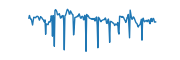
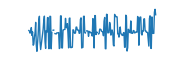
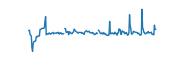
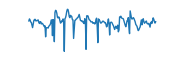
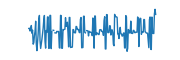
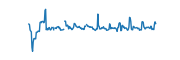

In [4]:
d

We see that sampling rate, number of datapoints and more is automatically printed along with the history of all operations applied to the dataset. This information can also be retrieved separately and in a form useful for further processing the function `summary()` which returns the information in the form of a `dict`:

In [5]:
d.summary()

{'name': 'test short',
 'n': 2047,
 'sampling_rate': 50,
 'data': ['left_x',
  'left_y',
  'left_pupil',
  'right_x',
  'right_y',
  'right_pupil'],
 'nevents': 40,
 'screen_limits': ((0, 1280), (0, 1024)),
 'physical_screen_size': (30, 20),
 'screen_eye_distance': 'not set',
 'duration_minutes': 0.6823333333333333,
 'start_min': 0.00015,
 'end_min': 0.6820666666666667,
 'parameters': '{}',
 'glimpse': 'EyeDataDict(vars=6,n=2047,shape=(2047,)): \n  left_x (float64): 656.5500000000001, 656.14, 654.0400000000001, 652.0199999999999, 650.4...\n  left_y (float64): 597.54, 591.5, 588.3899999999999, 593.7800000000001, 598.3199999999999...\n  left_pupil (float64): 1128.8869458721226, 1133.8058182761888, 1139.7069289167484, 1146.4462392731034, 1153.8027812522362...\n  right_x (float64): 775.56, 777.14, 777.08, 776.99, 778.72...\n  right_y (float64): 597.31, 601.3, 600.48, 595.3399999999999, 595.1...\n  right_pupil (float64): 954.2414624419623, 958.9101375371407, 963.632119267214, 968.2405296620

The history is internally stored in `PupilData`'s `history` variable.

## In-place vs. copying data

By default, `pypillometry` will do all operations in-place. That means, after running an operation (e.g., `d.downsample()`), the dataset will have changed. 

For example, the next code downsamples the data to 50 Hz and returns dataset `d2`. However, since the operation was in-place, the original dataset `d` is also changed:

In [16]:
d=pp.get_example_data("rlmw_002_short")
d2 = d.downsample(50)
print(f"d has {len(d)} samples")
print(f"d2 has {len(d2)} samples")
print(f"d and d2 are the same: {d is d2}")

d has 2047 samples
d2 has 2047 samples
d and d2 are the same: True


/home/mmi041/Dropbox/work/projects/pupil/pypillometry/docs/../pypillometry/signal/baseline.py:144: RuntimeWarning: Mean of empty slice
  y2=np.nanmean(y_padded.reshape(-1,R), axis=1)


This can be tricky when re-running a cell of a Notebook as the operations will simply be appended to the end of the history (i.e., blink-detection, downsampling, smoothing etc will be run multiple times on the same data). 

This can be prevented by adding `inplace=False` to any operation or by using `d.copy()` explicitly:

In [ ]:
# using inplace=False
d=pp.get_example_data("rlmw_002_short")
d2 = d.downsample(50, inplace=False)
print(f"d has {len(d)} samples")
print(f"d2 has {len(d2)} samples")
print(f"d and d2 are the same: {d is d2}")

d has 20465 samples
d2 has 2047 samples
d and d2 are the same: False


/home/mmi041/Dropbox/work/projects/pupil/pypillometry/docs/../pypillometry/signal/baseline.py:144: RuntimeWarning: Mean of empty slice
  y2=np.nanmean(y_padded.reshape(-1,R), axis=1)


In [27]:
# using copy()
d=pp.get_example_data("rlmw_002_short")
d2 = d.copy()
d2.downsample(50)
print(f"d has {len(d)} samples")
print(f"d2 has {len(d2)} samples")
print(f"d and d2 are the same: {d is d2}")

d has 20465 samples
d2 has 2047 samples
d and d2 are the same: False


/home/mmi041/Dropbox/work/projects/pupil/pypillometry/docs/../pypillometry/signal/baseline.py:144: RuntimeWarning: Mean of empty slice
  y2=np.nanmean(y_padded.reshape(-1,R), axis=1)


Another option is to revert back to the original data. Each `EyeData` object contains a copy of the original data right after creating the object that can be retrieved by simply writing `d.original`

EyeData(test short_bi, 2.0MiB):
 n                   : 20465
 sampling_rate       : 500.0
 data                : ['left_x', 'left_y', 'left_pupil', 'right_x', 'right_y', 'right_pupil']
 nevents             : 40
 screen_limits       : ((0, 1280), (0, 1024))
 physical_screen_size: (33.75, 27)
 screen_eye_distance : not set
 duration_minutes    : 0.6821666666666667
 start_min           : 121.07631666666666
 end_min             : 121.75845
 parameters          : {}
 glimpse             : EyeDataDict(vars=6,n=20465,shape=(20465,)): 
  left_x (float64): 655.6, 655.7, 655.0, 654.5, 655.0...
  left_y (float64): 599.9, 598.9, 597.6, 597.8, 597.8...
  left_pupil (float64): 1121.0, 1122.0, 1124.0, 1126.0, 1126.0...
  right_x (float64): 773.1, 773.8, 774.8, 776.3, 776.7...
  right_y (float64): 594.2, 593.9, 596.5, 597.4, 597.3...
  right_pupil (float64): 949.0, 951.0, 956.0, 959.0, 960.0...

 eyes                : ['right', 'left']
 nblinks             : {}
 blinks              : {'right': None, 'left': None}
 params              : {}
 History:
 *
 └ fill_time_discontinuities()
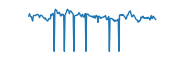
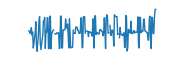
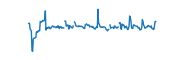
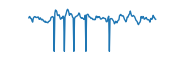
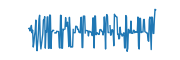
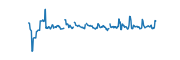

In [29]:
d2.original